**Natural language processing - TFIDF**


Term Frequency inverse document frequency
Natural language processing is evolving over the time that deals with understanding and processing human languages.


Machine learning algorithms can't directly work on raw data.Rather text must be converted into numbers for processing.In nlp features are the words which are important to understand the document(Meaning/context etc).

Term frequency inverse document frequency is one of the statistcal way that we can represent import features from text into numbers.Although it doesnt account the context and meaning of word.It is statical way of representing features.


Feature Engineering is often known as the secret sauce to creating superior and better performing machine learning models.In nlp we need to build pre-processing pipeline like:

Removing tags

Removing accented characters

Expanding contractions

Removing special characters

Stemming and lemmatization

Removing stopwords




---



In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
documentA = 'the man went out for a walk'
documentB = 'the children sat around the fire'

In [3]:
bagOfWordsA = documentA.split(' ')
bagOfWordsB = documentB.split(' ')

In [12]:
uniqueWords = set(bagOfWordsA).union(set(bagOfWordsB))
uniqueWords

{'a',
 'around',
 'children',
 'fire',
 'for',
 'man',
 'out',
 'sat',
 'the',
 'walk',
 'went'}

In [6]:
numOfWordsA = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsA:
    numOfWordsA[word] += 1
numOfWordsB = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsB:
    numOfWordsB[word] += 1

In [17]:
def computeTF(wordDict,bagOfWords):
  tfDict={}
  bagOfWordsCount=len(bagOfWords)
  for word,count in wordDict.items():
    tfDict[word] = count / float(bagOfWordsCount)
  return tfDict  


In [18]:
bagOfWordsA

['the', 'man', 'went', 'out', 'for', 'a', 'walk']

In [20]:
tfA = computeTF(numOfWordsA, bagOfWordsA)
tfB = computeTF(numOfWordsB, bagOfWordsB)

In [31]:
tfA

{'a': 0.14285714285714285,
 'around': 0.0,
 'children': 0.0,
 'fire': 0.0,
 'for': 0.14285714285714285,
 'man': 0.14285714285714285,
 'out': 0.14285714285714285,
 'sat': 0.0,
 'the': 0.14285714285714285,
 'walk': 0.14285714285714285,
 'went': 0.14285714285714285}

The log of the number of documents divided by the number of documents that contain the word w. Inverse data frequency determines the weight of rare words across all documents in the corpus.


In [23]:
def computeIDF(documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict

In [27]:
idfs=computeIDF([numOfWordsA, numOfWordsB])

In [32]:
idfs

{'a': 0.6931471805599453,
 'around': 0.6931471805599453,
 'children': 0.6931471805599453,
 'fire': 0.6931471805599453,
 'for': 0.6931471805599453,
 'man': 0.6931471805599453,
 'out': 0.6931471805599453,
 'sat': 0.6931471805599453,
 'the': 0.0,
 'walk': 0.6931471805599453,
 'went': 0.6931471805599453}

In [28]:
def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [29]:
tfidfA = computeTFIDF(tfA, idfs)
tfidfB = computeTFIDF(tfB, idfs)
df = pd.DataFrame([tfidfA, tfidfB])

In [30]:
df.head

,out,around,man,fire,walk,the,sat,went,children,for,a
0,0.099021,0.000000,0.099021,0.000000,0.099021,0.0,0.000000,0.099021,0.000000,0.099021,0.099021
1,0.000000,0.115525,0.000000,0.115525,0.000000,0.0,0.115525,0.000000,0.115525,0.000000,0.000000


**Sklearn feature extraction provdes inbuilt vectorizer for above functionality**

In [36]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([documentA, documentB])
vectors.shape

(2, 10)

In [37]:
feature_names = vectorizer.get_feature_names()

In [39]:
dense = vectors.todense()
denselist = dense.tolist()

(2, 10)

In [41]:
df = pd.DataFrame(denselist, columns=feature_names)

In [42]:
df.head()

,around,children,fire,for,man,out,sat,the,walk,went
0,0.000000,0.000000,0.000000,0.42616,0.42616,0.42616,0.000000,0.303216,0.42616,0.42616
1,0.407401,0.407401,0.407401,0.00000,0.00000,0.00000,0.407401,0.579739,0.00000,0.00000


**Business use case**

Identifying high impact exceptions to reduce production downtime using previous experience of high impact exceptions.

Assumptions: We have pattern/differentiator to identify high imapct and no impact exception categories.

**Key concepts:**


1.   TF-IDF matrix
2.   Cosine similarity-Cosine similarity basically gives us a metric representing the cosine of the angle between the feature vector representations of two text documents. Lower the angle between the documents, the closer and more similar they are.


Training data
Testing data

**Accuracy evaluation ** 

classification of statements based of probability threshold 

Document similarity is the process of using a distance or similarity based metric that can be used to identify how similar a text document is with any other document(s) based on features extracted from the documents like bag of words or tf-idf.


**Steps involved to solve this problem:**

1.Get the exception strings.

2.Clean up the text(pre-processing pipeline)

3.Filter the high impact exception strings using tri-gram search.(We had 22 exception classes on basis of which we searched unique excetions from cleaned exceptions  and labeled them as "High Impact" and rest of others can be labeled as "No impact")
(Here we have annotated data)

3.Create bag of word model for both classes "Impact" and "No Imapct"

4.Data visualization -word cloud, frequency graphs etc and deriving useful insights.Check if we are finding differentiating features between "imapct" and "no impact" class.If we have differentiating features we are good to go for model building.

5.Split the "Impact" labeled data into train and test (80:20)
(we were having this class less in numbers)

6.split the "No Impact" labeled data into train and test (70:30)
(had enough data)

7.Here we are building 2 seperate statistical matrix for "Impact" and "No impact"

8.Apply tfidf vectorizer on "Impact" train data(Save the matrix-numpy) and save the transformer as well

9.Apply tfidf vectorizer on "No impact" train data (save matrix-numpy) and save the transformer as well

10.Now 2 models are ready with us

11.Get the test data for impact and get "impact" statistical model.
transform test data and find the document similarity with each row in matrix.More the similarity higher the confidence to mark it as "Impact" and reverse holds true.

**How second model is useful??**

If "New Exception" comes in in the environment(New developer wrote some new pattern exception different from existing pattern of high/no impact) must go under manual observation called "USER FEEDBACK".If "No imapct" as well as "impact"model gives low similarity score it should go for user feedback treating it as "New" exception.If expert advised it as "High impact" we have to resolve the exception and whether to re-train the model with new category or not is totally the business decision.


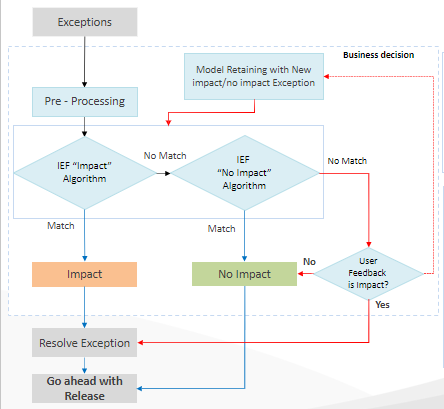

**It follow following kind of pipeline**

In [53]:
import numpy as np
import re
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, e...",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beaut...,weather
7,The dog is lazy but the brown fox is quick!,animals


In [54]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]])

In [56]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0


In [57]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_corpus)

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

,bacon eggs,beautiful sky,beautiful today,blue beautiful,blue dog,blue sky,breakfast sausages,brown fox,dog lazy,eggs ham,eggs toast,fox jumps,fox quick,green eggs,ham bacon,ham sausages,jumps lazy,kings breakfast,lazy brown,lazy dog,love blue,love green,quick blue,quick brown,sausages bacon,sausages ham,sky beautiful,sky blue,toast beans
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


In [59]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7
0,1.000000,0.820599,0.000000,0.000000,0.000000,0.192353,0.817246,0.000000
1,0.820599,1.000000,0.000000,0.000000,0.225489,0.157845,0.670631,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.791821,0.000000,0.850516
3,0.000000,0.000000,0.000000,1.000000,0.506866,0.000000,0.000000,0.000000
4,0.000000,0.225489,0.000000,0.506866,1.000000,0.000000,0.000000,0.000000
5,0.192353,0.157845,0.791821,0.000000,0.000000,1.000000,0.115488,0.930989
6,0.817246,0.670631,0.000000,0.000000,0.000000,0.115488,1.000000,0.000000
7,0.000000,0.000000,0.850516,0.000000,0.000000,0.930989,0.000000,1.000000
